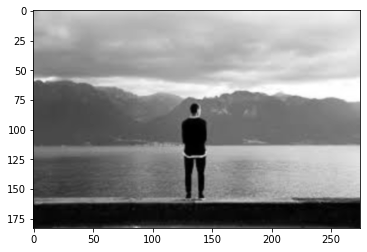

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('singleManHyst.jpeg', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap = 'gray', interpolation = 'bicubic')


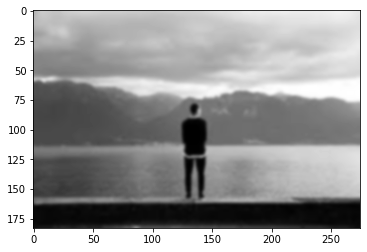

In [2]:
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blur, cmap = 'gray', interpolation = 'bicubic')

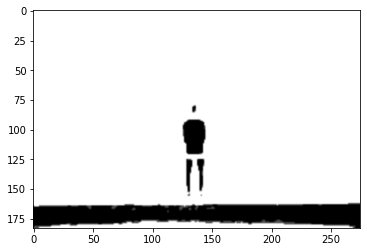

In [3]:
highThreshold = 20
lowThreshold = 15
 
M, N = blur.shape
out = np.zeros((M,N), dtype= np.uint8)
 
# If edge intensity is greater than 'High' it is a sure-edge
# below 'low' threshold, it is a sure non-edge
strong_i, strong_j = np.where(blur >= highThreshold)
zeros_i, zeros_j = np.where(blur < lowThreshold)
 
# weak edges
weak_i, weak_j = np.where((blur <= highThreshold) & (blur >= lowThreshold))
 
# Set same intensity value for all edge pixels
out[strong_i, strong_j] = 255
out[zeros_i, zeros_j ] = 0
out[weak_i, weak_j] = 75

plt.imshow(out, cmap = 'gray', interpolation = 'bicubic')

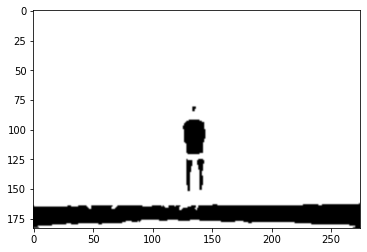

In [4]:
M, N = out.shape
for i in range(1, M-1):
    for j in range(1, N-1):
        if (out[i,j] == 75):
            if 255 in [out[i+1, j-1],out[i+1, j],out[i+1, j+1],out[i, j-1],out[i, j+1],out[i-1, j-1],out[i-1, j],out[i-1, j+1]]:
                out[i, j] = 255
            else:
                out[i, j] = 0
plt.imshow(out, cmap = 'gray', interpolation = 'bicubic')